In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Read the CSV and Perform Basic Data Cleaning

In [5]:
# Load the data

housing_df = pd.read_csv('Data\clean_merged_data.csv')

In [6]:
housing_df.head()

,City,Longitude,latitude,Population,median_age,median_income,median_house_value,total_rooms,Bedrooms,Households,ocean_proximity,max_temp,Humidity,Cloudiness,wind_speed,Description,County,Employees,Establishments
0,Mission Viejo,-117.66,33.61,789,16,8.4112,286900,2022,254,270,<1H OCEAN,94.75,63,59,5.01,broken clouds,Orange,1191075,71255
1,Mission Viejo,-117.66,33.62,1962,16,6.2177,256600,4065,661,636,<1H OCEAN,94.75,63,59,5.01,broken clouds,Orange,1191075,71255
2,Mission Viejo,-117.67,33.61,1972,24,5.7871,227400,3859,661,624,<1H OCEAN,94.75,63,59,5.01,broken clouds,Orange,1191075,71255
3,Mission Viejo,-117.66,33.61,1713,17,6.0471,248400,3464,519,530,<1H OCEAN,94.75,63,59,5.01,broken clouds,Orange,1191075,71255
4,Mission Viejo,-117.66,33.61,860,21,7.1497,274000,1932,266,286,<1H OCEAN,94.75,63,59,5.01,broken clouds,Orange,1191075,71255


In [7]:
#drop unnecessary/low value columns 'Longitude','latitude','City','County'

housing_df.drop(['City', 'County','Longitude','latitude'],axis=1, inplace=True)


In [8]:
#convert categorical values

housing_df=pd.get_dummies(housing_df)
housing_df.head()

,Population,median_age,median_income,median_house_value,total_rooms,Bedrooms,Households,max_temp,Humidity,Cloudiness,...,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,Description_broken clouds,Description_clear sky,Description_few clouds,Description_haze,Description_overcast clouds,Description_scattered clouds,Description_smoke,Description_thunderstorm
0,789,16,8.4112,286900,2022,254,270,94.75,63,59,...,0,0,1,0,0,0,0,0,0,0
1,1962,16,6.2177,256600,4065,661,636,94.75,63,59,...,0,0,1,0,0,0,0,0,0,0
2,1972,24,5.7871,227400,3859,661,624,94.75,63,59,...,0,0,1,0,0,0,0,0,0,0
3,1713,17,6.0471,248400,3464,519,530,94.75,63,59,...,0,0,1,0,0,0,0,0,0,0
4,860,21,7.1497,274000,1932,266,286,94.75,63,59,...,0,0,1,0,0,0,0,0,0,0


In [9]:
#group y variable data for analysis using increments 100k
######## can change as needed

df2 = housing_df.copy()

df2.loc[df2['median_house_value'].between(0, 100000, 'both'), 'house_value_group'] = '<= $100k'
df2.loc[df2['median_house_value'].between(100000, 200000, 'right'), 'house_value_group'] = 'between $100k and $200k'
df2.loc[df2['median_house_value'].between(200000, 300000, 'right'), 'house_value_group'] = 'between $200k and $300k'
df2.loc[df2['median_house_value'].between(300000, 400000, 'right'), 'house_value_group'] = 'between $300k and $400k'
df2.loc[df2['median_house_value'].between(400000, 1000000000, 'right'), 'house_value_group'] = '>$400k'

In [10]:
#encode new housing variable to numeric

le = LabelEncoder()

df2['house_value_group'] = le.fit_transform(df2['house_value_group']) 
print(df2.head())

print(df2['house_value_group'].value_counts())
print(df2.house_value_group)


   Population  median_age  median_income  median_house_value  total_rooms  \
0         789          16         8.4112              286900         2022   
1        1962          16         6.2177              256600         4065   
2        1972          24         5.7871              227400         3859   
3        1713          17         6.0471              248400         3464   
4         860          21         7.1497              274000         1932   

   Bedrooms  Households  max_temp  Humidity  Cloudiness  ...  \
0       254         270     94.75        63          59  ...   
1       661         636     94.75        63          59  ...   
2       661         624     94.75        63          59  ...   
3       519         530     94.75        63          59  ...   
4       266         286     94.75        63          59  ...   

   ocean_proximity_NEAR OCEAN  Description_broken clouds  \
0                           0                          1   
1                           0   

# Split the Data into Training and Testing

In [11]:
# Create our features ,axis=1,inplace=True,axis=1
########## using standard 80-20 training split can re-specify as needed

X = housing_df.copy()
X = X.drop(columns=["median_house_value"])
X.head()

# Create our target
y = df2[["house_value_group"]].copy()


In [12]:
X

,Population,median_age,median_income,total_rooms,Bedrooms,Households,max_temp,Humidity,Cloudiness,wind_speed,...,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,Description_broken clouds,Description_clear sky,Description_few clouds,Description_haze,Description_overcast clouds,Description_scattered clouds,Description_smoke,Description_thunderstorm
0,789,16,8.4112,2022,254,270,94.75,63,59,5.01,...,0,0,1,0,0,0,0,0,0,0
1,1962,16,6.2177,4065,661,636,94.75,63,59,5.01,...,0,0,1,0,0,0,0,0,0,0
2,1972,24,5.7871,3859,661,624,94.75,63,59,5.01,...,0,0,1,0,0,0,0,0,0,0
3,1713,17,6.0471,3464,519,530,94.75,63,59,5.01,...,0,0,1,0,0,0,0,0,0,0
4,860,21,7.1497,1932,266,286,94.75,63,59,5.01,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11448,4005,9,8.3931,10484,1603,1419,95.76,57,20,11.50,...,0,0,0,0,1,0,0,0,0,0
11449,1665,16,7.2554,3781,504,499,95.76,57,20,11.50,...,0,0,0,0,1,0,0,0,0,0
11450,2146,16,6.1504,4390,660,633,95.76,57,20,11.50,...,0,0,0,0,1,0,0,0,0,0
11451,2061,13,7.3681,5415,827,714,95.76,57,20,11.50,...,0,0,0,0,1,0,0,0,0,0


In [13]:
y

,house_value_group
0,3
1,3
2,3
3,3
4,3
...,...
11448,4
11449,4
11450,3
11451,4


In [14]:
X.describe()

,Population,median_age,median_income,total_rooms,Bedrooms,Households,max_temp,Humidity,Cloudiness,wind_speed,...,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,Description_broken clouds,Description_clear sky,Description_few clouds,Description_haze,Description_overcast clouds,Description_scattered clouds,Description_smoke,Description_thunderstorm
count,11453.000000,11453.000000,11453.000000,11453.000000,11453.000000,11453.000000,11453.000000,11453.000000,11453.000000,11453.000000,...,11453.000000,11453.000000,11453.000000,11453.000000,11453.000000,11453.000000,11453.000000,11453.000000,11453.000000,11453.000000
mean,1418.182310,29.464682,4.020455,2555.831660,530.219244,496.074129,93.964839,55.465118,17.593731,9.627652,...,0.116039,0.069240,0.094036,0.563608,0.233127,0.002532,0.039553,0.059373,0.006374,0.001397
std,1059.406866,12.138935,1.979255,2097.909448,411.703906,370.943204,6.659285,17.079511,26.313119,3.740398,...,0.320286,0.253872,0.291892,0.495959,0.422841,0.050258,0.194915,0.236332,0.079585,0.037352
min,3.000000,1.000000,0.499900,6.000000,2.000000,2.000000,61.840000,9.000000,0.000000,1.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,790.000000,20.000000,2.647700,1421.000000,292.000000,279.000000,91.400000,46.000000,0.000000,6.910000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1170.000000,30.000000,3.645800,2077.000000,429.000000,408.000000,95.310000,59.000000,0.000000,11.500000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1729.000000,37.000000,4.964300,3052.000000,638.000000,599.000000,97.930000,66.000000,20.000000,11.500000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,15507.000000,52.000000,15.000100,32054.000000,5419.000000,5050.000000,108.090000,95.000000,100.000000,21.850000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# Check the balance of the target values
y['house_value_group'].value_counts()

2    4414
3    3211
4    1359
0    1346
1    1123
Name: house_value_group, dtype: int64

In [16]:
y.describe()

,house_value_group
count,11453.000000
mean,2.184580
std,1.135425
min,0.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,4.000000


In [17]:
########## using standard 80-20 training split can re-specify as needed

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,stratify=y)

In [18]:
########################   check the test and trainig sets  

print(f"X_train ",X_train.shape) 
print(f"X_test ",X_test.shape) 
print(f"y_train ",y_train.shape) 
print(f"y_test ",y_test.shape)

X_train  (8589, 25)
X_test  (2864, 25)
y_train  (8589, 1)
y_test  (2864, 1)


# Ensemble Learners
Run Random Forest and evaluate

Depending on need,
compare two algorithms to determine which algorithm results in the best performance:

**Random Forest Regressor
**Hist Gradient Booster Regressor

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

In [19]:
scaler = StandardScaler()

In [20]:
X_scaler = scaler.fit(X_train)

print(X_scaler)

StandardScaler()


In [21]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [22]:
rf_model = RandomForestClassifier(n_estimators=1000,random_state=1)

In [23]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [24]:
predictions = rf_model.predict(X_test_scaled)

In [25]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1","Actual_2","Actual_3","Actual_4"], columns=["Predicted 0", "Predicted 1","Predicted 2","Predicted 3","Predicted 4"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [26]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 0,246,0,88,2,0
Actual 1,2,190,9,32,48
Actual_2,57,3,895,141,8
Actual_3,4,9,199,544,47
Actual_4,1,47,28,122,142


Accuracy Score : 0.7042597765363129
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       336
           1       0.76      0.68      0.72       281
           2       0.73      0.81      0.77      1104
           3       0.65      0.68      0.66       803
           4       0.58      0.42      0.49       340

    accuracy                           0.70      2864
   macro avg       0.70      0.66      0.68      2864
weighted avg       0.70      0.70      0.70      2864



In [27]:
importances = rf_model.feature_importances_
importances

array([1.00632530e-01, 7.88747432e-02, 2.20426726e-01, 9.70850674e-02,
       8.06594310e-02, 8.00101226e-02, 7.90756228e-02, 6.86004955e-02,
       1.42425569e-02, 3.62576519e-02, 3.93841244e-02, 4.14637728e-02,
       1.05296545e-02, 2.10496460e-02, 1.53800381e-04, 5.38064248e-03,
       4.53616038e-03, 3.81845185e-03, 5.97401675e-03, 5.58630737e-03,
       1.44155311e-04, 1.81836975e-03, 3.90115244e-03, 1.59633738e-04,
       2.35165233e-04])

In [28]:
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.22042672569627186, 'median_income'),
 (0.10063252970954728, 'Population'),
 (0.09708506736172165, 'total_rooms'),
 (0.08065943103231815, 'Bedrooms'),
 (0.08001012262463003, 'Households'),
 (0.07907562276908732, 'max_temp'),
 (0.07887474319442578, 'median_age'),
 (0.06860049553522493, 'Humidity'),
 (0.04146377278106224, 'Establishments'),
 (0.03938412443063894, 'Employees'),
 (0.036257651855121094, 'wind_speed'),
 (0.021049645994914448, 'ocean_proximity_INLAND'),
 (0.014242556883213053, 'Cloudiness'),
 (0.01052965446579228, 'ocean_proximity_<1H OCEAN'),
 (0.005974016745783495, 'Description_clear sky'),
 (0.005586307365383289, 'Description_few clouds'),
 (0.005380642479979971, 'ocean_proximity_NEAR BAY'),
 (0.004536160377781234, 'ocean_proximity_NEAR OCEAN'),
 (0.00390115244164042, 'Description_scattered clouds'),
 (0.003818451845519835, 'Description_broken clouds'),
 (0.0018183697462815542, 'Description_overcast clouds'),
 (0.00023516523325634842, 'Description_thunderstorm'),
 (0.00

###  Random Forest Regressor

In [29]:
######## selected n_estimators 1,000, criterion squared error

############### n_estimators: 1000,2000,3000,5000
############### criterion: 
################ default values n_estimators=100, *, criterion=‘mse’, max_depth=None, min_samples_split=2 

random_forest_est=1000
random_forest_crit='squared error'

#random_forest = RandomForestRegressor(n_estimators = rf_est, random_state = 1,criterion='squared error', max_features = 'sqrt',
                                     # max_depth = 5)
random_forest = RandomForestRegressor(n_estimators = 1000, random_state = 1,criterion='squared_error',max_features = 'sqrt',
                                      max_depth = 5)

random_forest.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=1000,
                      random_state=1)

## Interpreting Output

###  mean absolute error
 
The mean absolute error (MAE) is the simplest regression error metric to understand. We’ll calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. We then take the average of all these residuals. 

MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.


In [30]:
# Calculated actual v. predicted values for y

y_pred = random_forest.predict(X_test)
print(len(y_pred))
print(len(y_test))

print(f"y_pred ",y_pred)
print(f"y_test ", y_test)

M = y_test['house_value_group'].to_numpy()

df=pd.DataFrame({'Actual':M, 'Predicted':y_pred})
df



2864
2864
y_pred  [2.50241618 1.51488278 2.63820935 ... 2.66924265 2.67974455 2.44435508]
y_test         house_value_group
570                    1
11174                  2
5312                   3
1876                   3
7631                   4
...                  ...
4231                   1
9710                   3
653                    1
11378                  3
5113                   4

[2864 rows x 1 columns]


,Actual,Predicted
0,1,2.502416
1,2,1.514883
2,3,2.638209
3,3,2.601603
4,4,2.598404
...,...,...
2859,1,2.468562
2860,3,2.235278
2861,1,2.669243
2862,3,2.679745


In [31]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7378728202782046
Mean Squared Error: 0.8015625483896771
Root Mean Squared Error: 0.8953002559977726


In [32]:
# Calculate the absolute errors
#errors=[]
errors = abs(y_pred - M)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

print(errors)
print(y_test)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / M)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.74 degrees.
[1.50241618 0.48511722 0.36179065 ... 1.66924265 0.32025545 1.55564492]
       house_value_group
570                    1
11174                  2
5312                   3
1876                   3
7631                   4
...                  ...
4231                   1
9710                   3
653                    1
11378                  3
5113                   4

[2864 rows x 1 columns]
Accuracy: -inf %.


In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest, X, y, cv=10, scoring='neg_mean_absolute_error')
print(scores)

[-0.86751906 -0.64332751 -0.84534692 -0.71112449 -0.86283927 -0.69277276
 -0.68627367 -0.77562706 -0.83672815 -0.78503303]


In [34]:
# List the features sorted in descending order by feature importance
features = sorted(zip(X_train.columns, random_forest.feature_importances_), key = lambda x: x[1], reverse=True)
features[:35]

[('median_income', 0.21609851838134012),
 ('Establishments', 0.17203665026290157),
 ('Employees', 0.1634003778402989),
 ('ocean_proximity_INLAND', 0.12936038548888182),
 ('Humidity', 0.11094930039242167),
 ('max_temp', 0.06705610691804503),
 ('ocean_proximity_<1H OCEAN', 0.03516734754238863),
 ('total_rooms', 0.02042576957884066),
 ('wind_speed', 0.014750181995356255),
 ('median_age', 0.014053662508037438),
 ('ocean_proximity_NEAR BAY', 0.011925888313757491),
 ('Households', 0.01013552335414261),
 ('Cloudiness', 0.008608300054500037),
 ('Bedrooms', 0.007575782268243485),
 ('Population', 0.006134097620922853),
 ('Description_clear sky', 0.0032351892902585727),
 ('ocean_proximity_NEAR OCEAN', 0.0025323579697215143),
 ('Description_broken clouds', 0.0023933271578252557),
 ('Description_few clouds', 0.0016107841842867242),
 ('Description_scattered clouds', 0.0009657019665060002),
 ('Description_smoke', 0.0007756546780971075),
 ('Description_overcast clouds', 0.0007505453916556311),
 ('Desc

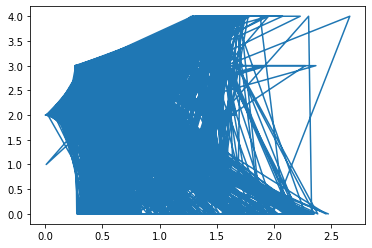

In [35]:
x=len(y_test)
plt.plot(errors, y_test)
#lines(x, M, col="red")
#legend("topleft", legend = c("y-original", "y-predicted"),
       #col = c("blue", "red"), pch = c(19,NA), lty = c(NA,1),  cex = 0.7)
plt.show()

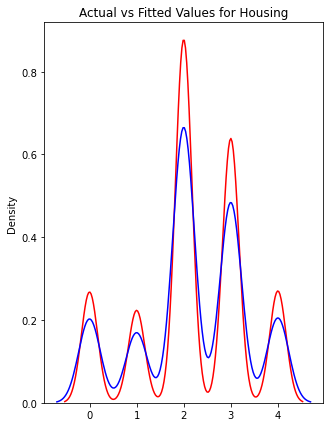

In [36]:
import seaborn as sns
plt.figure(figsize=(5, 7))
ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(M, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Housing')
plt.show()
plt.close()

#higher resolution graph
X_grid = np.arange(min(X),max(X),0.01)
X_grid = X_grid.reshape(len(X_grid),1) 
 
plt.scatter(X,y, color='red') #plotting real points
plt.plot(X_grid, random_forest.predict(X_grid),color='blue') #plotting for predict points
 
plt.title("Truth or Bluff(Random Forest - Smooth)")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

**Random Forest Model Tuning

In [37]:
##################### Tuning the model  ###################################
#################### ran 14 hours no result ###############################

################## suspend for troubleshooting ###########################
########################code cells converted to markdown ##################

################## result of processing post-interrupt

KeyboardInterrupt                         Traceback (most recent call last)
~\AppData\Local\Temp\ipykernel_1808\832952718.py in <module>
      1 GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5)
----> 2 GSCV.fit(X_train, y_train)

~\anaconda3\envs\mlenv\lib\site-packages\sklearn\model_selection\_search.py in fit(self, X, y, groups, **fit_params)
    889                 return results
    890 
--> 891             self._run_search(evaluate_candidates)
    892 
    893             # multimetric is determined here because in the case of a callable

~\anaconda3\envs\mlenv\lib\site-packages\sklearn\model_selection\_search.py in _run_search(self, evaluate_candidates)
   1390     def _run_search(self, evaluate_candidates):
   1391         """Search all candidates in param_grid"""
-> 1392         evaluate_candidates(ParameterGrid(self.param_grid))
   1393 
   1394 

~\anaconda3\envs\mlenv\lib\site-packages\sklearn\model_selection\_search.py in evaluate_candidates(candidate_params, cv, more_results)
    849                     )
    850                     for (cand_idx, parameters), (split_idx, (train, test)) in product(
--> 851                         enumerate(candidate_params), enumerate(cv.split(X, y, groups))
    852                     )
    853                 )

~\anaconda3\envs\mlenv\lib\site-packages\joblib\parallel.py in __call__(self, iterable)
   1044                 self._iterating = self._original_iterator is not None
   1045 
-> 1046             while self.dispatch_one_batch(iterator):
   1047                 pass
   1048 

~\anaconda3\envs\mlenv\lib\site-packages\joblib\parallel.py in dispatch_one_batch(self, iterator)
    859                 return False
    860             else:
--> 861                 self._dispatch(tasks)
    862                 return True
    863 

~\anaconda3\envs\mlenv\lib\site-packages\joblib\parallel.py in _dispatch(self, batch)
    777         with self._lock:
    778             job_idx = len(self._jobs)
--> 779             job = self._backend.apply_async(batch, callback=cb)
    780             # A job can complete so quickly than its callback is
    781             # called before we get here, causing self._jobs to

~\anaconda3\envs\mlenv\lib\site-packages\joblib\_parallel_backends.py in apply_async(self, func, callback)
    206     def apply_async(self, func, callback=None):
    207         """Schedule a func to be run"""
--> 208         result = ImmediateResult(func)
    209         if callback:
    210             callback(result)

~\anaconda3\envs\mlenv\lib\site-packages\joblib\_parallel_backends.py in __init__(self, batch)
    570         # Don't delay the application, to avoid keeping the input
    571         # arguments in memory
--> 572         self.results = batch()
    573 
    574     def get(self):

~\anaconda3\envs\mlenv\lib\site-packages\joblib\parallel.py in __call__(self)
    261         with parallel_backend(self._backend, n_jobs=self._n_jobs):
    262             return [func(*args, **kwargs)
--> 263                     for func, args, kwargs in self.items]
    264 
    265     def __reduce__(self):

~\anaconda3\envs\mlenv\lib\site-packages\joblib\parallel.py in <listcomp>(.0)
    261         with parallel_backend(self._backend, n_jobs=self._n_jobs):
    262             return [func(*args, **kwargs)
--> 263                     for func, args, kwargs in self.items]
    264 
    265     def __reduce__(self):

~\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\fixes.py in __call__(self, *args, **kwargs)
    214     def __call__(self, *args, **kwargs):
    215         with config_context(**self.config):
--> 216             return self.function(*args, **kwargs)
    217 
    218 

~\anaconda3\envs\mlenv\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator, X, y, scorer, train, test, verbose, parameters, fit_params, return_train_score, return_parameters, return_n_test_samples, return_times, return_estimator, split_progress, candidate_progress, error_score)
    678             estimator.fit(X_train, **fit_params)
    679         else:
--> 680             estimator.fit(X_train, y_train, **fit_params)
    681 
    682     except Exception:

~\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py in fit(self, X, y, sample_weight)
    465                     n_samples_bootstrap=n_samples_bootstrap,
    466                 )
--> 467                 for i, t in enumerate(trees)
    468             )
    469 

~\anaconda3\envs\mlenv\lib\site-packages\joblib\parallel.py in __call__(self, iterable)
   1044                 self._iterating = self._original_iterator is not None
   1045 
-> 1046             while self.dispatch_one_batch(iterator):
   1047                 pass
   1048 

~\anaconda3\envs\mlenv\lib\site-packages\joblib\parallel.py in dispatch_one_batch(self, iterator)
    859                 return False
    860             else:
--> 861                 self._dispatch(tasks)
    862                 return True
    863 

~\anaconda3\envs\mlenv\lib\site-packages\joblib\parallel.py in _dispatch(self, batch)
    777         with self._lock:
    778             job_idx = len(self._jobs)
--> 779             job = self._backend.apply_async(batch, callback=cb)
    780             # A job can complete so quickly than its callback is
    781             # called before we get here, causing self._jobs to

~\anaconda3\envs\mlenv\lib\site-packages\joblib\_parallel_backends.py in apply_async(self, func, callback)
    206     def apply_async(self, func, callback=None):
    207         """Schedule a func to be run"""
--> 208         result = ImmediateResult(func)
    209         if callback:
    210             callback(result)

~\anaconda3\envs\mlenv\lib\site-packages\joblib\_parallel_backends.py in __init__(self, batch)
    570         # Don't delay the application, to avoid keeping the input
    571         # arguments in memory
--> 572         self.results = batch()
    573 
    574     def get(self):

~\anaconda3\envs\mlenv\lib\site-packages\joblib\parallel.py in __call__(self)
    261         with parallel_backend(self._backend, n_jobs=self._n_jobs):
    262             return [func(*args, **kwargs)
--> 263                     for func, args, kwargs in self.items]
    264 
    265     def __reduce__(self):

~\anaconda3\envs\mlenv\lib\site-packages\joblib\parallel.py in <listcomp>(.0)
    261         with parallel_backend(self._backend, n_jobs=self._n_jobs):
    262             return [func(*args, **kwargs)
--> 263                     for func, args, kwargs in self.items]
    264 
    265     def __reduce__(self):

~\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\fixes.py in __call__(self, *args, **kwargs)
    214     def __call__(self, *args, **kwargs):
    215         with config_context(**self.config):
--> 216             return self.function(*args, **kwargs)
    217 
    218 

~\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py in _parallel_build_trees(tree, forest, X, y, sample_weight, tree_idx, n_trees, verbose, class_weight, n_samples_bootstrap)
    183             curr_sample_weight *= compute_sample_weight("balanced", y, indices=indices)
    184 
--> 185         tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
    186     else:
    187         tree.fit(X, y, sample_weight=sample_weight, check_input=False)

~\anaconda3\envs\mlenv\lib\site-packages\sklearn\tree\_classes.py in fit(self, X, y, sample_weight, check_input, X_idx_sorted)
   1318             sample_weight=sample_weight,
   1319             check_input=check_input,
-> 1320             X_idx_sorted=X_idx_sorted,
   1321         )
   1322         return self

~\anaconda3\envs\mlenv\lib\site-packages\sklearn\tree\_classes.py in fit(self, X, y, sample_weight, check_input, X_idx_sorted)
    418             )
    419 
--> 420         builder.build(self.tree_, X, y, sample_weight)
    421 
    422         if self.n_outputs_ == 1 and is_classifier(self):

KeyboardInterrupt: 

GSCV.best

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
random_forest_tuning = RandomForestRegressor(random_state = 1)

In [40]:
param_grid = { 
    'n_estimators': [1000, 2000, 5000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae']
}

## show start time
print(datetime.now())

## Grid Search function

CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid1, cv= 5)
CV_frf.fit(x_train, y_train)

## show end time
print(datetime.now())


GSCV.best_params_

##fit best parameters

random_forest_tuned = RandomForestRegressor(criterion= 'mae',max_depth= 8,max_features= 'sqrt',n_estimators =1000,random_state = 1)
random_forest_tuned.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

### Hist Gradient Booster Regressor

In [41]:
 from sklearn.experimental import enable_hist_gradient_boosting

In [42]:
HistGradientBoostingRegressor(loss='squared_error', *, quantile=None, learning_rate=0.1,
                                  max_iter=100, max_leaf_nodes=31, max_depth=None, min_samples_leaf=20, 
                                  l2_regularization=0.0, max_bins=255, categorical_features=None, 
                                  monotonic_cst=None, warm_start=False, early_stopping='auto', 
                                  scoring='loss', validation_fraction=0.1, n_iter_no_change=10, 
                                  tol=1e-07, verbose=0, random_state=None)

SyntaxError: invalid syntax (3729387111.py, line 1)

In [ ]:
# define the model
model = HistGradientBoostingRegressor().fit(X_train,y_train)
model.score(X_train,t_train)